# Exercise 4.9 - Part 2

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Updating the path to include more of the folder path to make our later code cleaner
path = r"C:\Users\jphar\Instacart Basket Analysis 09-2025"

In [3]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "ords_prods_cust_merge.pkl"))

In [4]:
# Just to have a reminder of the shape, field names, and data types of the fields

ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   hour_ordered_of_day     int64   
 5   days_since_prior_order  float64 
 6   first_time_order        object  
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  price_category          object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_or

## 2 - Exercise Demonstration Visualizations

### Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

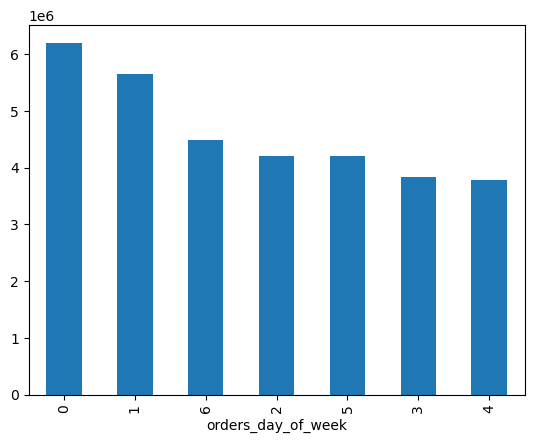

In [5]:
# Creating a bar chart based on orders_day_of_week based on the frequency for each day of week

ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

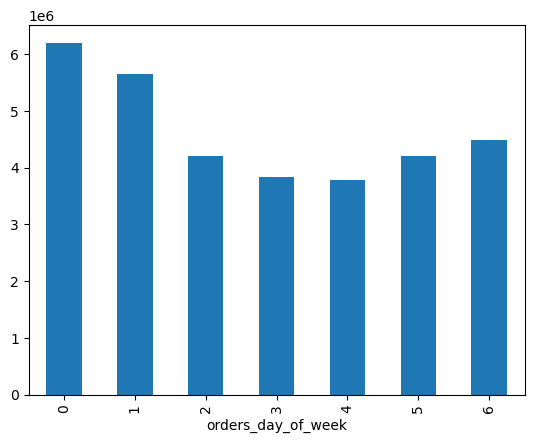

In [8]:
# Sorting based on index order

ords_prods_cust_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# tabular version of the first viz

ords_prods_cust_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [10]:
# tabular version of the second viz

ords_prods_cust_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

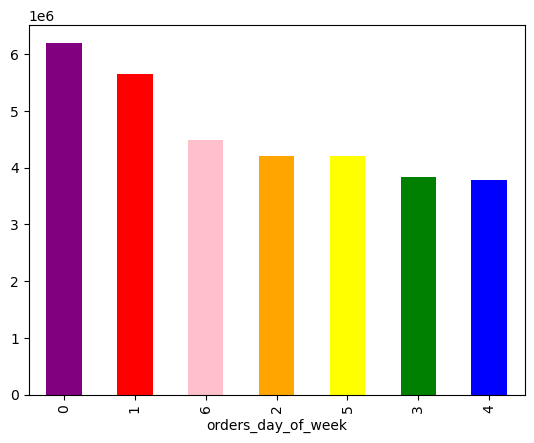

In [11]:
# Changing around colors

ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink','orange', 'yellow', 'green', 'blue'])

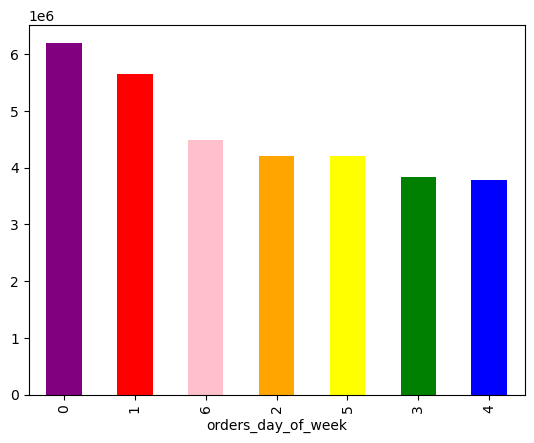

In [12]:
# Assigned to a variable for easier reference

bar = ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink','orange', 'yellow', 'green', 'blue'])

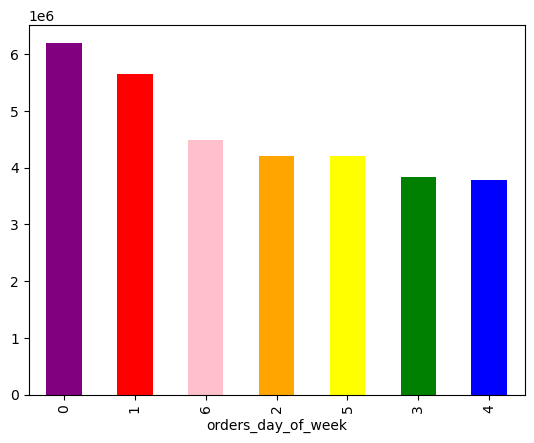

In [13]:
# Viewing the viz based on the variable

bar.figure

In [14]:
# Exporting the Viz

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

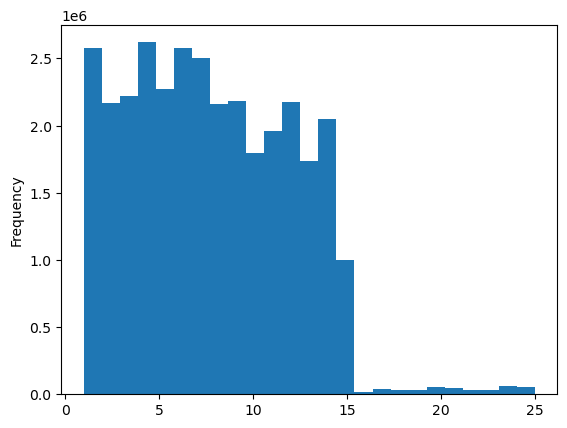

In [27]:
# Note, in the exercise we already cleaned out the outliers in prices field so we won't be able to replicate

ords_prods_cust_merge['prices'].plot.hist(bins = 25)

In [17]:
ords_prods_cust_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [18]:
ords_prods_cust_merge['prices'].mean()

np.float64(7.7909940921733645)

In [19]:
ords_prods_cust_merge['prices'].median()

7.4

In [20]:
ords_prods_cust_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

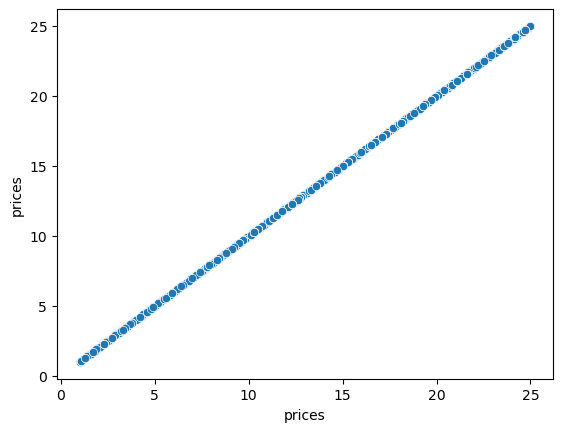

In [22]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust_merge)

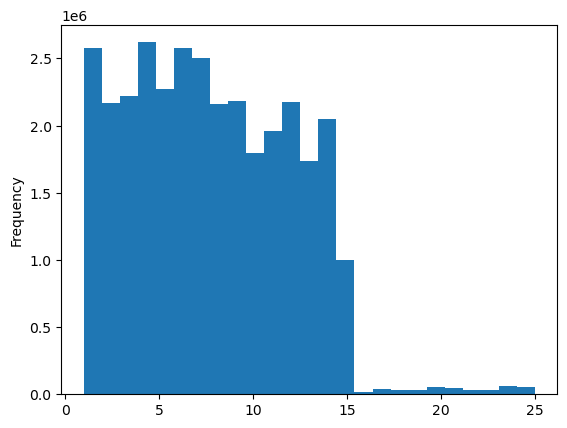

In [24]:
hist = ords_prods_cust_merge['prices'].plot.hist(bins = 25)

In [25]:
# Exporting the viz

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### Creating Line Charts and Sampling

In [29]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
big = ords_prods_cust_merge[dev]

In [32]:
small = ords_prods_cust_merge[~dev]

In [34]:
len(ords_prods_cust_merge)

32404859

In [33]:
len(big) + len(small)

32404859

In [36]:
df_2 = small[['orders_day_of_week', 'prices']]

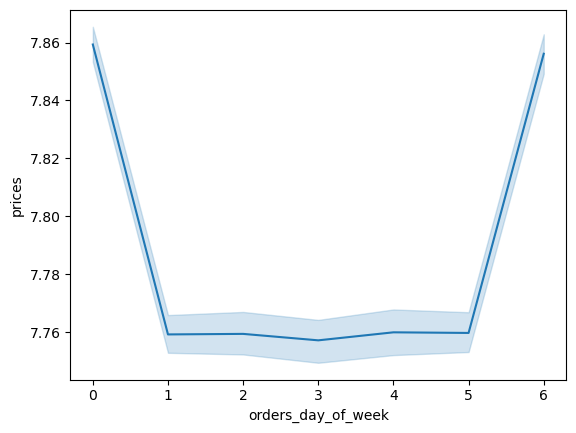

In [37]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [39]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_day_of_week.png'))

## 3 - Histogram of `order_hour_of_day` (aka `hour_ordered_of_day`)

In [44]:
# Taking a quick look of the distribution before building the viz

ords_prods_cust_merge['hour_ordered_of_day'].value_counts()

hour_ordered_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

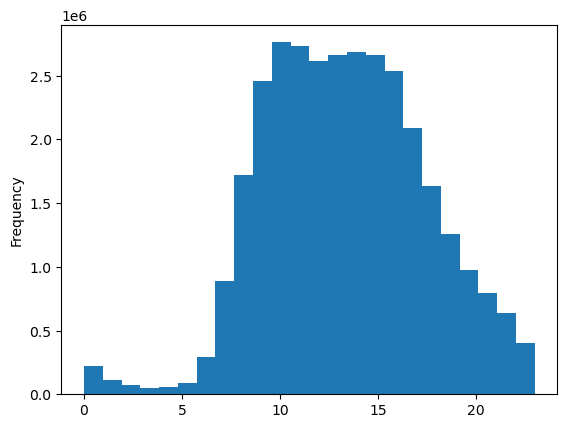

In [51]:
# Making the bins the number of hours in a day - 24

ords_prods_cust_merge['hour_ordered_of_day'].plot.hist(bins = 24)

#### Analysis: This histogram shows the frequency of orders based on the hour bucket that the transaction occurred. As we can see, the highest amount of volume of orders span from 9am to 4pm. From there, the volume of orders tappers off as it gets to 5 pm to midnight. Our lowest volume of orders occur from midnight to 6am and begins to pick up at 7am.

## 4 - Bar Chart of `loyalty_flag`

In [22]:
# Taking a quick look of the distribution before building the viz

ords_prods_cust_merge['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

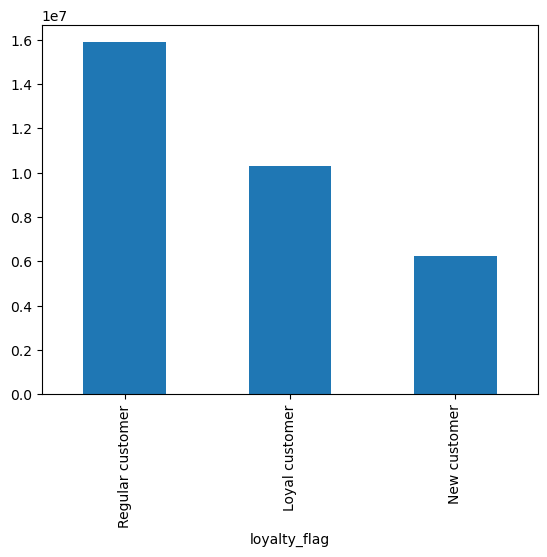

In [23]:
bar_loyalty = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()

In [25]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

## 5 - Time Series Chart of Expenditure by Hour 

In [6]:
# To set this up we'll first need to create a list that will store the randomized boolean values to parse the data.
# I'm opting for a 70/30 split

np.random.seed(10)
split = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [7]:
# Now we'll make subsets of ords_prods_cust_merge based off of the randomization we built with the split variable

big = ords_prods_cust_merge[split]

small = ords_prods_cust_merge[~split]

In [14]:
# Some quick verification to ensure that the split was successful

len(ords_prods_cust_merge)

32404859

In [10]:
len(big) + len(small)

32404859

In [19]:
# Creating an additional subset that will only take the two fields of interest: prices and hour_ordered_of_day

df_line = small[['prices', 'hour_ordered_of_day']]

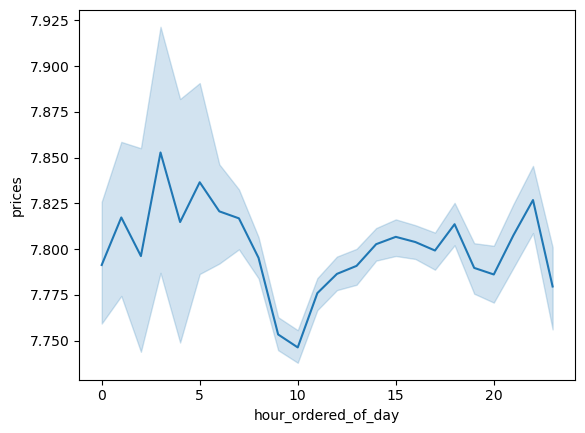

In [20]:
line_by_hour = sns.lineplot(data = df_line, x = 'hour_ordered_of_day', y = 'prices')

In [18]:
line_by_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cost_per_hour.png'))

NameError: name 'line_by_hour' is not defined

## 6 - Time Series Chart of Age and Number of Dependents

In [4]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_ordered_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_category',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_order_price', 'spender_type', 'median_days_prior',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependents', 'martial_status', 'income'],
      dtype='object')

In [8]:
# FIrst i'm going to leverage the small variable we initialized earlier that has 30% of the data
# and assign it to df_line2 for the age and num_of_dependents

df_line2 = small[['age', 'num_of_dependents']]

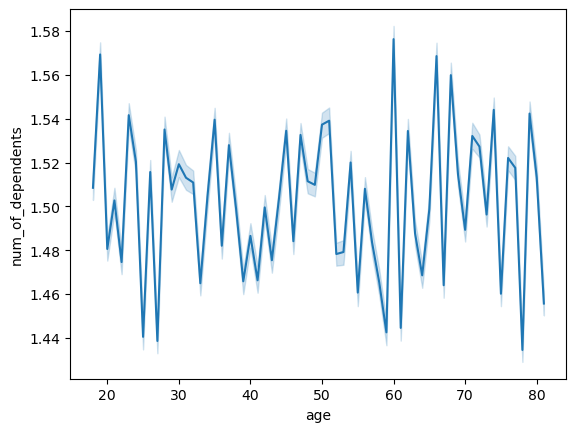

In [9]:
line_by_age = sns.lineplot(data = df_line2, x = 'age', y = 'num_of_dependents')

### Analysis: So based on this chart, we can see that there's a narrow range to the data from 1.44 to 1.58. However, there is quite a bit of volatility with various peaks and troughs as we move along the age axis. And as we see, the data is not trending either upward or downward so there doesn't appear to be much of a connection between a person's age and the number of dependents in their care.

In [17]:
line_by_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_and_dependents_line.png'))

## 7 - Correlation between Age and Income

In [13]:
# We're going to use the small variable again but only leverage the age and income fields and assign it into df_scatter

df_scatter = small[['age', 'income']]

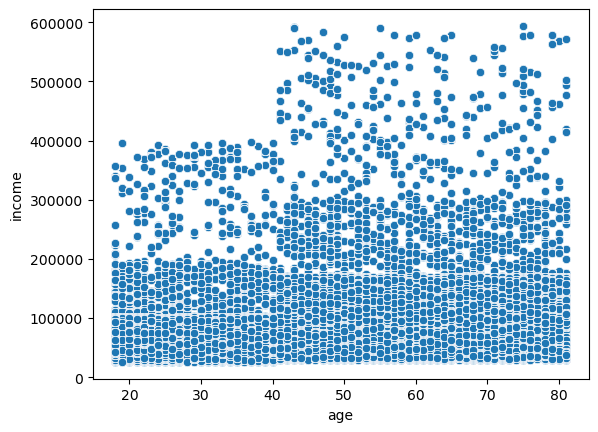

In [14]:
age_income_scatter = line_by_age = sns.scatterplot(data = df_scatter, x = 'age', y = 'income')

### Analysis: From our scatterplot, we see that there are various income amounts as we move along the age axis from just over $25,903 to nearly $60,000. While we may see from age 40 to 80 that some of these incomes are much higher compare to those under age 40 the overall data would suggest there to be no correlation (or association) with age and income.

In [15]:
df_scatter['income'].describe()

count    9.725376e+06
mean     9.944098e+04
std      4.309255e+04
min      2.590300e+04
25%      6.699100e+04
50%      9.660800e+04
75%      1.279160e+05
max      5.939010e+05
Name: income, dtype: float64

In [16]:
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))